# Assignment 1 - Matrix multiplication in Numba

### for quick reading: please find * marked solutions and comments, thanks.

We consider the problem of evaluating the matrix multiplication 𝐶=𝐴×𝐵 for matrices 𝐴,𝐵∈ℝ𝑛×𝑛. A simple Python implementation of the matrix-matrix product is given below through the function matrix_product. At the end this function is checked against the Numpy implementation of the matrix-matrix product.

In [ ]:
import numpy as np

def matrix_product(mat_a, mat_b):
    """Returns the product of the matrices mat_a and mat_b."""
    m = mat_a.shape[0]
    n = mat_b.shape[1]

    assert(mat_a.shape[1] == mat_b.shape[0])

    ncol = mat_a.shape[1]

    mat_c = np.zeros((m, n), dtype=np.float64)

    for row_ind in range(m):
        for col_ind in range(n):
            for k in range(ncol):
                mat_c[row_ind, col_ind] += mat_a[row_ind, k] * mat_b[k, col_ind]

    return mat_c

a = np.random.randn(10, 10)
b = np.random.randn(10, 10)

c_actual = matrix_product(a, b)
c_expected = a @ b

error = np.linalg.norm(c_actual - c_expected) / np.linalg.norm(c_expected)
print(f"The error is {error}.")

The matrix product is one of the most fundamental operations on modern computers. Most algorithms eventually make use of this operation. A lot of effort is therefore spent on optimising the matrix product. Vendors provide hardware optimised BLAS (Basis Linear Algebra Subroutines) that provide highly efficient versions of the matrix product. Alternatively, open-source libraries sucha as Openblas provide widely used generic open-source implementations of this operation.

In this assignment we want to learn at the example of matrix-matrix products about the possible speedups offered by Numba, and the effects of cache-efficient programming.

# Section 1

Benchmark the above function against the Numpy dot product for matrix sizes up to 1000. Plot the timing results of the above function against the timing results for the Numpy dot product. You need not benchmark every dimension up to 1000. Figure out what dimensions to use so that you can represent the result without spending too much time waiting for the code to finish. To perform benchmarks you can use the %timeit magic command. An example is

In [ ]:
timeit_result = %timeit -o matrix_product(a, b)
print(timeit_result.best)

## *Solution for Section 1

935 ns ± 15.3 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)
1.03 µs ± 15 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)
The error is nan.


<ipython-input-9-46cfea191ef4>:42: RuntimeWarning: invalid value encountered in double_scalars
  error = np.linalg.norm(c_actual - c_expected) / np.linalg.norm(c_expected)


21.7 µs ± 2.93 µs per loop (mean ± std. dev. of 7 runs, 100000 loops each)
57.5 ms ± 411 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
The error is 0.0.
70.1 µs ± 7.15 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
456 ms ± 6.21 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
The error is 0.0.
234 µs ± 43.6 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
1.55 s ± 5.68 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
The error is 0.0.
446 µs ± 27.1 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
3.63 s ± 7.56 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
The error is 0.0.
752 µs ± 20.7 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
7.11 s ± 65.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
The error is 0.0.
1.3 ms ± 23.7 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
12.3 s ± 24.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
The error is 5.563421898382404e-16.
1.94 ms ± 40.4 µs per loop 

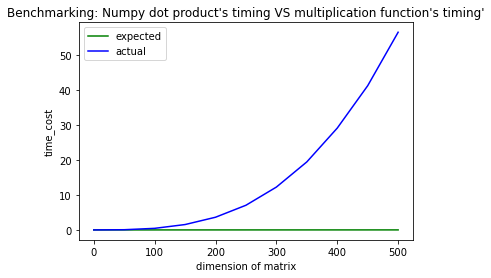

In [9]:
import numpy as np
import matplotlib.pyplot as plt

def matrix_product(mat_a, mat_b):
    """Returns the product of the matrices mat_a and mat_b."""
    m = mat_a.shape[0]
    n = mat_b.shape[1]

    assert(mat_a.shape[1] == mat_b.shape[0]) 

    ncol = mat_a.shape[1] 

    mat_c = np.zeros((m, n), dtype=np.float64) 

    for row_ind in range(m):
        for col_ind in range(n):
            for k in range(ncol):
                mat_c[row_ind, col_ind] += mat_a[row_ind, k] * mat_b[k, col_ind]

    return mat_c

dimensions = np.arange(0,550,50) # assign dimensions of matrices for research 
#remark: due to much lower operating speed with higher dimensions, the highest dimension is set to be 500

time_expected = [] # set a list to store timings of Numpy dot product
time_actual = [] # set a list to store timings of the above matrix_product function

for i in dimensions: 
# for every matrix with an assigned dimension, compute its timings of operating the function and the Numpy dot product 
    a = np.random.randn(i, i) 
    b = np.random.randn(i, i)

    timeit_result_expected = %timeit -o a @ b
    time_expected.append(timeit_result_expected.best)
    
    timeit_result_actual = %timeit -o matrix_product(a, b)
    time_actual.append(timeit_result_actual.best)
    
    c_expected = a @ b
    c_actual = matrix_product(a, b)
    
    error = np.linalg.norm(c_actual - c_expected) / np.linalg.norm(c_expected)
    print(f"The error is {error}.")
    
# plot to benchmark time-cost of the function agaist that of Numpy dot product as the dimension increases up to 500
x = dimensions
y1 = time_expected
y2 = time_actual
    
print(x,'\n',y1,'\n',y2)

plt.plot(x, y1, color='green', label='expected')
plt.plot(x, y2, color='blue', label='actual')

plt.title("Benchmarking: Numpy dot product's timing VS multiplication function's timing'")
plt.xlabel('dimension of matrix')
plt.ylabel('time_cost')
plt.legend()

## *Comment

From the plot, I found the following properties of the timing results.

The timing results of Numpy dot product and the matrix_product function demonstrate different trends when the dimensions of the matrices that carry out multiplication increase. 

The timing results of the Numpy dot product shows slightly increasing with values below 0.01s when the dimensions are lower than or equal to 500. While timing results of the function are correlative to the dimensions of the matrices. The timing result grows up as the dimension increases generating a curve shaped like an exponential function with the highest value of 56.5s at the 500 dimension. 


# Section 2

Now optimise the code by using Numba to JIT-compile it. Also, there is lots of scope for parallelisation in the code. You can for example parallelize the outer-most for-loop. Benchmark the JIT-compiled serial code against the JIT-compiled parallel code. Comment on the expected performance on your system against the observed performance.

## *Solution for Section 2

714 ns ± 8.34 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)
154 µs ± 76.5 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)
The error bewteen jit and non-jit is 7.141649405747834e-16.
The error bewteen jitprl and non-jit is 7.141649405747834e-16.


<ipython-input-22-569620417c99>:63: RuntimeWarning: invalid value encountered in double_scalars
  error1 = np.linalg.norm(c_1 - c_expected) / np.linalg.norm(c_expected)
<ipython-input-22-569620417c99>:66: RuntimeWarning: invalid value encountered in double_scalars
  error2 = np.linalg.norm(c_2 - c_expected) / np.linalg.norm(c_expected)


61.7 µs ± 250 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)
141 µs ± 2.15 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
The error bewteen jit and non-jit is 7.141649405747834e-16.
The error bewteen jitprl and non-jit is 7.141649405747834e-16.
609 µs ± 4.12 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
319 µs ± 5.77 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
The error bewteen jit and non-jit is 7.141649405747834e-16.
The error bewteen jitprl and non-jit is 7.141649405747834e-16.
2.53 ms ± 29.6 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
674 µs ± 14.9 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
The error bewteen jit and non-jit is 7.141649405747834e-16.
The error bewteen jitprl and non-jit is 7.141649405747834e-16.
6.35 ms ± 22.1 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
1.38 ms ± 31.7 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
The error bewteen jit and non-jit is 7.1416494057478

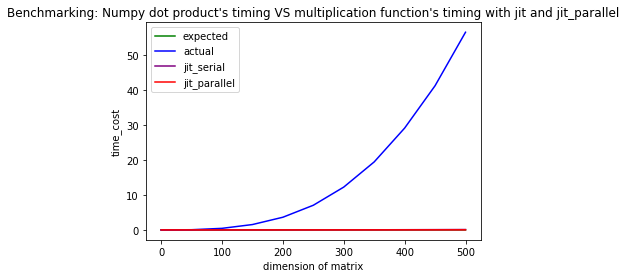

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from numba import jit, njit, prange

@njit(parallel = True) # tell Numba to just-in-time compile the function and parallel the outer-most for-loop with prange
def matrix_product_jitprl(mat_a, mat_b):
    """Returns the product of the matrices mat_a and mat_b with JIT parallelization speed-up."""
    m = mat_a.shape[0]
    n = mat_b.shape[1]

    assert(mat_a.shape[1] == mat_b.shape[0]) 

    ncol = mat_a.shape[1] 

    mat_c = np.zeros((m, n), dtype=np.float64) 

    for row_ind in prange(m):
        for col_ind in range(n):
            for k in range(ncol):
                mat_c[row_ind, col_ind] += mat_a[row_ind, k] * mat_b[k, col_ind]

    return mat_c

@njit # tell Numba to just-in-time compile the function
def matrix_product_jit(mat_a, mat_b):
    """Returns the product of the matrices mat_a and mat_b with JIT speed-up."""
    m = mat_a.shape[0]
    n = mat_b.shape[1]

    assert(mat_a.shape[1] == mat_b.shape[0]) 

    ncol = mat_a.shape[1] 

    mat_c = np.zeros((m, n), dtype=np.float64) 

    for row_ind in range(m):
        for col_ind in range(n):
            for k in range(ncol):
                mat_c[row_ind, col_ind] += mat_a[row_ind, k] * mat_b[k, col_ind]

    return mat_c

dimensions = np.arange(0,550,50) #assign dimensions of matrices for research

time_jit_serial = [] # set a list to store timings of the jit-complied function 
time_jit_parallel = [] # set a list to store timings of the jit-complied and prange-paralleled function

for i in dimensions: 
# for every matrix with an assigned dimension, compute its timings of the jit-complied and prange-paralleled function 
    a = np.random.randn(i, i) 
    b = np.random.randn(i, i)

    timeit_result_jit_serial = %timeit -o matrix_product_jit(a, b)
    time_jit_serial.append(timeit_result_jit_serial.best)
    
    timeit_result_jit_parallel = %timeit -o matrix_product_jitprl(a, b)
    time_jit_parallel.append(timeit_result_jit_parallel.best)
    
    c_expected = a @ b
    c_1 = matrix_product_jit(a, b)
    c_2 = matrix_product_jitprl(a, b)
    
    error1 = np.linalg.norm(c_1 - c_expected) / np.linalg.norm(c_expected)
    print(f"The error bewteen jit and non-jit is {error}.")
    
    error2 = np.linalg.norm(c_2 - c_expected) / np.linalg.norm(c_expected)
    print(f"The error bewteen jitprl and non-jit is {error}.")

# plot to benchmark timings of JIT-compiled serial code against the JIT-compiled parallel code as the dimension increases up to 500    
x = dimensions
y3 = time_jit_serial
y4 = time_jit_parallel

print(x,'\n',y1,'\n',y2,'\n',y3,'\n',y4)

plt.plot(x, y1, color='green', label='expected')
plt.plot(x, y2, color='blue', label='actual')
plt.plot(x, y3, color='purple', label='jit_serial')
plt.plot(x, y4, color='red', label='jit_parallel')
plt.title("Benchmarking: Numpy dot product's timing VS multiplication function's timing with jit and jit_parallel")
plt.xlabel('dimension of matrix')
plt.ylabel('time_cost')
plt.legend()

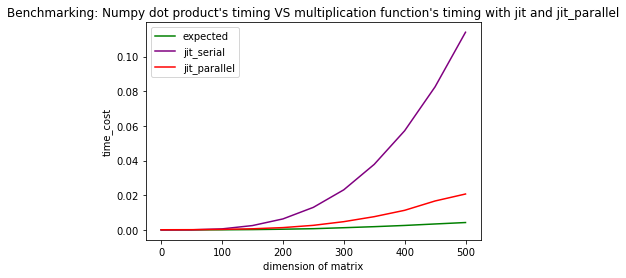

In [24]:
#in order to observe the cases around the scatters of the 'expected' case, plot the timings except the stray scatters of the 'actual' case
plt.plot(x, y1, color='green', label='expected')
plt.plot(x, y3, color='purple', label='jit_serial')
plt.plot(x, y4, color='red', label='jit_parallel')
plt.xlabel('dimension of matrix')
plt.ylabel('time_cost')
plt.title("Benchmarking: Numpy dot product's timing VS multiplication function's timing with jit and jit_parallel")
plt.legend()

## *Comment

The performance of the function improves significantly with the help of JIT. Meanwhile, as the dimension of the matrix increases, the timings of the function with jit-complier and jit-prange-parallelization both climb up. 

For more discoveries, I will focus on the points where the dimension is 500. 

In the JIT-compiled serial case, the timing here is 0.11s. Compared to the counterpart 56.5s in the case without jit speed-up, the timing reduces by over 500 times. It is a strong evidence for JIT's powerful speeding performance.
As for the JIT-compiled parallel case, the timing shows lower than that of the JIT-compiled serial case by over 5 times with a value of 0.02s. It proves that levering prange to split some for-loop into independently working threads indeed improves the computing property.


# Section 3

Now let us improve Cache efficiency. Notice that in the matrix 𝐵 we traverse by columns. However, the default storage ordering in Numpy is row-based. Hence, the expression mat_b[k, col_ind] jumps in memory by n units if we move from 𝑘 to 𝑘+1. Run your parallelized JIT-compiled Numba code again. But this time choose a matrix 𝐵 that is stored in column-major order. To change an array to column major order you can use the command np.asfortranarray.

## *Solution for Section 3

146 µs ± 50.2 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)
The error bewteen jit_parallel_fortran and non-jit is 7.141649405747834e-16.


<ipython-input-12-a90626af5d33>:39: RuntimeWarning: invalid value encountered in double_scalars
  error1 = np.linalg.norm(c - c_expected) / np.linalg.norm(c)


192 µs ± 58.4 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)
The error bewteen jit_parallel_fortran and non-jit is 7.141649405747834e-16.
315 µs ± 7.83 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
The error bewteen jit_parallel_fortran and non-jit is 7.141649405747834e-16.
652 µs ± 10.3 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
The error bewteen jit_parallel_fortran and non-jit is 7.141649405747834e-16.
1.36 ms ± 28.9 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
The error bewteen jit_parallel_fortran and non-jit is 7.141649405747834e-16.
2.74 ms ± 150 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
The error bewteen jit_parallel_fortran and non-jit is 7.141649405747834e-16.
4.46 ms ± 62.1 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
The error bewteen jit_parallel_fortran and non-jit is 7.141649405747834e-16.
7.2 ms ± 244 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
The error bewteen jit_parallel_fortran a

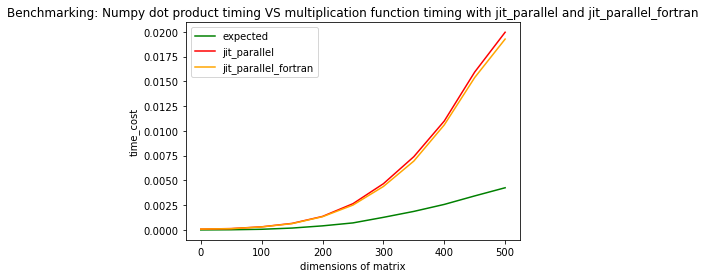

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from numba import jit, njit, prange

@njit(parallel = True)
def matrix_product_jitprl_fortran(mat_a, mat_b):
    """Returns the product of the matrices mat_a and mat_b with JIT parallelization speed-up."""
    m = mat_a.shape[0]
    n = mat_b.shape[1]

    assert(mat_a.shape[1] == mat_b.shape[0]) 

    ncol = mat_a.shape[1] 

    mat_c = np.zeros((m, n), dtype=np.float64) 

    for row_ind in prange(m):
        for col_ind in range(n):
            for k in range(ncol):
                mat_c[row_ind, col_ind] += mat_a[row_ind, k] * mat_b[k, col_ind]

    return mat_c

dimensions = np.arange(0,550,50) #assign dimensions of matrices for research

time_jit_parallel_fortran = [] # set a list to store timings of the jit-complied and prange-paralleled function whose mat_bs are column-based

for i in dimensions: 
# for every matrix with an assigned dimension, compute its timings of operating the function and the Numpy dot product 
    a = np.random.randn(i, i) 
    b = np.asfortranarray(np.random.randn(i, i))# change array_b's order to column-based
    
    timeit_result_jit_parallel_fortran = %timeit -o matrix_product_jitprl_fortran(a, b)
    time_jit_parallel_fortran.append(timeit_result_jit_parallel_fortran.best)
    
    c_expected = a @ b
    c = matrix_product_jitprl_fortran(a, b)
    
    error1 = np.linalg.norm(c - c_expected) / np.linalg.norm(c)
    print(f"The error bewteen jit_parallel_fortran and non-jit is {error}.")

# plot to benchmark time-cost of the function with column-based-order mat_b against with row-based-order mat_b as the dimension increases up to 500 
x = dimensions
y5 = time_jit_parallel_fortran

print(x,'\n',y1,'\n',y4,'\n',y5)

plt.plot(x, y1, color='green', label='expected')
plt.plot(x, y4, color='red', label='jit_parallel')
plt.plot(x, y5, color='orange', label='jit_parallel_fortran')
plt.title('Benchmarking: Numpy dot product timing VS multiplication function timing with jit_parallel and jit_parallel_fortran')
plt.xlabel('dimensions of matrix')
plt.ylabel('time_cost')
plt.legend()

## *Comment

After adjusting the matrix b's order from row-based to column-based, the gap between timings of the two cases shows the tendency of growing. It means that when datasizes in the cache grow up, improving cache efficiency will benefit more to raise computing efficiency. 

# Section 4

We can still try to improve efficiency. A frequent technique to improve efficiency for the matrix-matrix product is through blocking. Consider the command in the inner-most loop mat_c[row_ind, col_ind] += mat_a[row_ind, k] * mat_b[k, col_ind]. Instead of updating a single element mat_c[row_ind, col_ind] we want to update a ℓ×ℓ submatrix. Hence, the inner multiplication becomes itself the product of two ℓ×ℓ submatrices, and instead of iterating element by element we move forward in terms of ℓ×ℓ blocks. Implement this scheme. For the innermost ℓ×ℓ matrix use a standard serial triple loop. Investigate how benchmark timings depend on the parameter ℓ and how this implementation compares to your previous schemes. For simplicity you may want to choose outer-matrix dimensions that are multiples of ℓ so that you need not deal in your code with the remainder part of the matrix if the dimensions are not divisible by ℓ. Note that while such schemes are used in practical implementations of the matrix-matrix product it is not immediately clear that a Numba implementation here will be advantageous. There is a lot going on in the compiler in between writing Numba loops and actually producing machine code. Real libraries are written in much lower-level languages and can optimize closer to the hardware. Your task is to experiment to see if this blocked approach has advantages within Numba.

## *Solution for Section 4

### 1) Compare with previous schemes

129 µs ± 56.4 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)
274 µs ± 140 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)
402 µs ± 2.85 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
881 µs ± 5.76 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
1.79 ms ± 11.2 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
3.44 ms ± 30.5 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
5.82 ms ± 60.1 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
8.83 ms ± 72.3 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
13 ms ± 209 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
19.2 ms ± 84.7 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
23.7 ms ± 559 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
l=5 [8.49170010042144e-05, 0.00013679100084118545, 0.0003985190000003058, 0.0008750329169997712, 0.001768736624999292, 0.0034016770900052507, 0.005742064589994698, 0.008732564999991154, 0.012748082500002056, 0.01899867459

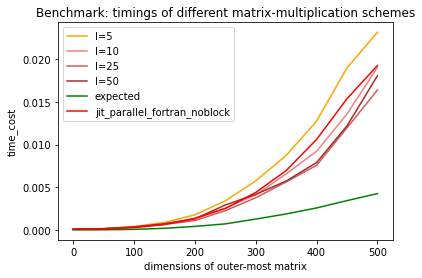

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from numba import jit, njit, prange

@njit(parallel=True)
def matrix_product_jitprl_fortran_block(mat_a, mat_b, l):
    """Returns the product of the matrices mat_a and mat_b with JIT parallelization speed-up levering submatrices."""
    m = mat_a.shape[0]
    n = mat_b.shape[1]
    
    assert(mat_a.shape[1] == mat_b.shape[0] and m%l == 0 and n%l == 0) 
    # only if outer-matrix's dimensions are multiples of ℓ and mat_a's column quantity equals to mat_b's row quantity, the following codes can be executed
    
    mat_c = np.zeros((m, n), dtype=np.float64)
    ncol = mat_a.shape[1]

    for r1 in prange(0, m, 1): # traverse a submatrix's initiative row indices
        if r1%l != 0: # set step=1 to ensure prange is available
            continue
        r2 = r1 + l # generate corresponding submatrix's the last row indices
        for c1 in range(0, n, l): # traverse a submatrix's initiative column indices
            c2 = c1 + l # generate corresponding submatrix's the last column indices
            for q1 in range(0, ncol, l): # traverse mat_a's submatrix's initiative column indices
                q2 = q1 + l # generate mat_a's submatrix's last column indices
                for row_ind in range(l): 
                # traverse the assigned submatrix's every element, multipulate them to obtain the submatrix
                    for col_ind in range(l):
                        for k in range(l):
                            mat_c[r1:r2,c1:c2][row_ind, col_ind] += mat_a[r1:r2,q1:q2][row_ind, k] * mat_b[q1:q2,c1:c2][k, col_ind]
    
    return mat_c

dimensions = np.arange(0,550,50) #assign dimensions of matrices for the research

# for submatrices with different dimensions, compute timings of the above function and plot against outer-most matrices' dimensions
j = 0
for l in [5,10,25,50]:
    time_block_d = []
    c = ['orange','lightcoral','indianred','brown','maroon']
    for i in dimensions:
        a = np.random.randn(i, i) 
        b = np.asfortranarray(np.random.randn(i, i))

        timeit_block = %timeit -o matrix_product_jitprl_fortran_block(a, b, l)
        time_block_d.append(timeit_block.best)

    x = dimensions
    y = time_block_d

    plt.plot(x, y, color=c[j], label='l={}'.format(l))
    j += 1
    
    print('l={}'.format(l),y)
    

plt.plot(x, y1, color='green', label='expected')
plt.plot(x, y5, color='red', label='jit_parallel_fortran_noblock')

plt.xlabel('dimensions of outer-most matrix')
plt.ylabel('time_cost')
plt.title('Benchmark: timings of different matrix-multiplication schemes')
plt.legend()

### *Comment

The advantage of the blocked approach is not obvious within Numba. 

When the dimensions of the submatrices are 5, the timings are longer than those of the case not using the blocked approach with other elements identical. But when ℓ increases up to 10, the timings begin to be lower than those of the case not levering the blocked approach. What's more, as ℓ becomes larger, the speeding performance of the blocked method shows a little improvement with some fluctuations. When the outer-most matrix's dimension is 500, the lowest timing is 0.016s at ℓ=25 point. It is 0.003s lower than that of non-block case, which is a tuny difference.

### 2) Explore multiplication timing trend against ℓ ( with dimensions of outer-most matrices fixed) 

1.28 s ± 14.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
The error bewteen block and expected_no_block is 1.1055705953236267e-15.
174 ms ± 892 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
The error bewteen block and expected_no_block is 1.1055705953236267e-15.
125 ms ± 1.97 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
The error bewteen block and expected_no_block is 1.1055705953236267e-15.
107 ms ± 3.74 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
The error bewteen block and expected_no_block is 1.1055705953236267e-15.
120 ms ± 2.37 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
The error bewteen block and expected_no_block is 1.1055705953236267e-15.
173 ms ± 3.37 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
The error bewteen block and expected_no_block is 1.1055705953236267e-15.
230 ms ± 1.17 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
The error bewteen block and expected_no_block is 1.1055705953236267e-15.
464 

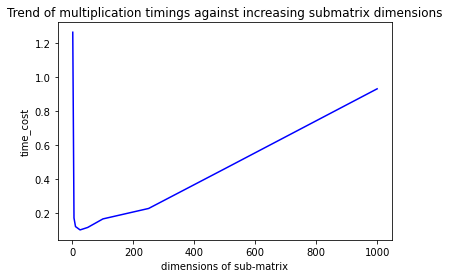

In [19]:
i = 1000 # assign the outer-most matrix's dimension
a = np.random.randn(i, i)
b = np.asfortranarray(np.random.randn(i, i))
time_block_l = [] # set a list to store timings

# for a matrix with the fixed dimension blocked into a series of sub-matrices, compute timings of the above function and plot against submatrices' dimensions    
for l in [1,5,10,25,50,100,250,500,1000]:
    timeit_block = %timeit -o matrix_product_jitprl_fortran_block(a, b, l)
    time_block_l.append(timeit_block.best)
    c_expected = a @ b
    c = matrix_product_jit_fortran_block(a, b, l)
    
    error1 = np.linalg.norm(c - c_expected) / np.linalg.norm(c)
    print(f"The error bewteen block and expected_no_block is {error1}.")
    
x = [1,5,10,25,50,100,250,500,1000]
y = time_block_l
plt.xlabel('dimensions of sub-matrix')
plt.ylabel('time_cost')
plt.title('Trend of multiplication timings against increasing submatrix dimensions')
plt.plot(x, y, color='blue', label='dimension={}'.format(i))
    

### *Comment

When the dimension of the outer-most matrix is fixed at 1000, the increasing dimensions of sub-matrices will lead to higher time-cost of the function, showing a curve shaped like a line (leaving the 0 point). That means when the dimensions of sub-matrices become larger, or the number of elements in a submatrix becomes smaller, the computing efficiency reduces. In a nutshell, approperiately blocking matrices will contribute to the matrices multiplication's computing performance.
